In [14]:
from bs4 import BeautifulSoup
import datetime
from fa2 import ForceAtlas2
import json
import matplotlib.pyplot as plt
import networkx as nx
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
from nltk.corpus import stopwords as sw
from nltk.corpus import words
from nltk.probability import FreqDist
#from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import WhitespaceTokenizer
import numpy as np
import pandas as pd
import pickle
from PIL import Image
import re
import wptools
import wordcloud
from wordcloud import ImageColorGenerator, WordCloud


ZODIAC_SIGNS = ['Aquarius', 'Aries', 'Cancer', 'Capricorn', 'Gemini', 'Leo', 'Libra', 'Pisces', 'Sagittarius', 'Scorpio', 'Taurus', 'Virgo']
ZODIAC_ELEMENTS = ['Water, Fire, Earth, Air']

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lulka\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lulka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\lulka\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [15]:
#Load the dataframe with all of our data
df = pd.read_csv('./datafiles/final_df.csv')

df.drop(['Unnamed: 0'], axis = 1, inplace =True)
df.drop(['FollowersCount'], axis = 1, inplace =True)
df.drop_duplicates(subset ="Handle", inplace = True)
df.reset_index(drop=True, inplace=True)

df.head()
print(len(df))

2169


In [95]:
# Create the nodes of the graph
G = nx.DiGraph()
G.add_nodes_from(df.Handle)

# Set the attributes of the nodes
nx.set_node_attributes(G, dict(zip(df.Handle, df.ZodiacSign)), "zodiac")
nx.set_node_attributes(G, dict(zip(df.Handle, df.Element)), "element")

# Create the links of the graph


In [7]:
# Remove isolates
isolated = list(nx.isolates(G))
G.remove_nodes_from(isolated)

# Select giant connected component
largest_cc = max(nx.weakly_connected_components(G), key=len)
G = G.subgraph(largest_cc).copy()

# Create undirected graph
U = G.to_undirected()

print("The number of nodes in the network is: ", G.number_of_nodes())
print("The number of links in the network is: ", G.number_of_edges())

{'@barackobama': 'Leo', '@justinbieber': 'Pisces', '@katyperry': 'Scorpio', '@rihanna': 'Pisces', '@cristiano': 'Aquarius', '@taylorswift13': 'Sagittarius', '@ladygaga': 'Aries', '@theellenshow': 'Aquarius', '@realdonaldtrump': 'Gemini', '@arianagrande': 'Cancer', '@kimkardashian': 'Libra', '@jtimberlake': 'Aquarius', '@selenagomez': 'Cancer', '@narendramodi': 'Virgo', '@britneyspears': 'Sagittarius', '@shakira': 'Aquarius', '@jimmyfallon': 'Virgo', '@billgates': 'Scorpio', '@neymarjr': 'Aquarius', '@kingjames': 'Capricorn', '@jlo': 'Leo', '@mileycyrus': 'Sagittarius', '@oprah': 'Aquarius', '@brunomars': 'Libra', '@srbachchan': 'Libra', '@beingsalmankhan': 'Capricorn', '@iamsrk': 'Scorpio', '@niallofficial': 'Virgo', '@drake': 'Scorpio', '@ddlovato': 'Leo', '@wizkhalifa': 'Virgo', '@kevinhart4real': 'Cancer', '@akshaykumar': 'Virgo', '@harry_styles': 'Aquarius', '@imvkohli': 'Scorpio', '@liltunechi': 'Libra', '@elonmusk': 'Cancer', '@louis_tomlinson': 'Capricorn', '@kyliejenner': 'Leo'

In [ ]:
# Plot the in and out degree distribution
in_degree = [value for key, value in list(G.in_degree())]
plt.hist(in_degree, bins=range(np.min(in_degree), np.max(in_degree)+1), alpha=0.5, label="in")

out_degree = [value for key, value in list(G.out_degree())]
plt.hist(out_degree, bins=range(np.min(out_degree), np.max(out_degree)+1), alpha=0.5, label="out")

plt.title("title")
plt.ylabel("Frequency")
plt.xlabel("Degree")
plt.legend()
plt.figtext(
    0.5, 
    -0.05, 
    'hi', 
    wrap=True, 
    horizontalalignment='center', 
    fontsize=12
)
plt.show()

In [ ]:
# Display the network using forceAtlas

# Color the nodes based on the zodiac sign
node_color = []
for node in G.nodes(data=True):
    # if the node has the attribute group1
    if node[1]['zodiac'] is 'Aries':
        node_color.append('#FFFF66')
    elif node[1]['zodiac'] is 'Taurus':
        node_color.append('gold')
    elif node[1]['zodiac'] is 'Gemini':
        node_color.append('orange')
    elif node[1]['zodiac'] is 'Cancer':
        node_color.append('orangered')
    elif node[1]['zodiac'] is 'Leo':
        node_color.append('crimson')
    elif node[1]['zodiac'] is 'Virgo':
        node_color.append('mediumvioletred')
    elif node[1]['zodiac'] is 'Libra':
        node_color.append('darkviolet')
    elif node[1]['zodiac'] is 'Scorpio':
        node_color.append('mediumblue')
    elif node[1]['zodiac'] is 'Sagittarius':
        node_color.append('royalblue')
    elif node[1]['zodiac'] is 'Capricorn':
        node_color.append('c')
    elif node[1]['zodiac'] is 'Aquarius':
        node_color.append('green')
    elif node[1]['zodiac'] is 'Pisces':
        node_color.append('limegreen')
    else:
        #print('color for', node[1]['zodiac'], 'not found')
        node_color.append('grey')
        
# Size the nodes based on their degree
node_size = [v*0.5 for v in dict(G.degree).values()]

# Configure forceAtlas
forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=2.0,
                        strongGravityMode=False,
                        gravity=1.0,

                        # Log
                        verbose=False)

# Obtain the positions
positions = forceatlas2.forceatlas2_networkx_layout(U, pos=None, iterations=200)

In [ ]:
# PLot the undirected graph
nx.draw_networkx_nodes(U, pos=pos, alpha=0.3, node_size=node_size, node_color=node_color)
nx.draw_networkx_edges(U, pos=pos, alpha=0.7,width=0.2)

# Caption figure
plt.figtext(
    0.5, 
    0.1, 
    'Fig. todo: Visual representation of the celebrity network G using force Atlas 2 positions', 
    wrap=True, 
    horizontalalignment='center', 
    fontsize=12
)

# Create legend
color_legend = {
    'Aries': '#FFFF66', 'Taurus': 'gold', 'Gemini': 'orange', 'Cancer': 'orangered', 'Leo': 'crimson', 'Virgo': 'mediumvioletred', 'Libra': 'darkviolet', 'Scorpio': 'mediumblue', 'Sagittarius': 'royalblue', 'Capricorn': 'c', 'Aquarius': 'green', 'Pisces': 'limegreen'}
for label in color_legend:
    plt.plot([0],[0],color=color_legend[label],label=label)
plt.legend()

plt.show()

In [165]:
# Tokenize the tweets to add them as node attributes

# Remove stopwords from the two most common languages
stopwords = sw.words('english') + sw.words('spanish') + sw.words('portuguese') + sw.words('french')
englishwords = words.words()
tokenizer = WhitespaceTokenizer()

tokens_dict = {}

#remove punctuation (but keep hashtags)
#if word is not a hashtag
    #only keep if it is in english


# TODO: Remove words like "bri..."
for node in df.Handle:
    tweets = df.loc[df['Handle'] == node].Tweets.values
    tweet_words = ' '.join(tweets)
      
    pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    raw = pattern.sub('', tweet_words)
    raw = raw.replace('\\n',' ')
    raw = raw.replace('\\',' ')
    raw = raw.replace('=',' ')
    raw = raw.replace('/',' ')
    raw = raw.replace('(',' ')
    raw = raw.replace(')',' ')
    raw = raw.replace(',',' ')
    raw = raw.replace('.',' ')
    raw = raw.lower()
       
    #pattern1 = re.compile('[^\s]*\.{3,}')
    #words = pattern1.sub('', words)
    #words = nltk.tokenize.word_tokenize(words)
    tweet_words = tokenizer.tokenize(raw)
    
    # Lowercase all words, remove hyphens
    # words = [word.lower().replace('-', '') for word in words]
    # Remove stopwords
    tweet_words = [word for word in tweet_words if word not in stopwords and if word in englishwords]
    
    tokens_dict[node] = tweet_words

    
nx.set_node_attributes(G, tokens_dict, "tokens")    

In [171]:
for node in df.Handle:
    tokens_dict[node] = [word for word in tokens_dict[node] if word[0] != '#']

In [180]:
nx.set_node_attributes(G, tokens_dict, "tokens")  

In [181]:
# Get the term frequency for our communities (zodiac signs)

words = set()
# Create documents with the words of each character in each community
documents = {}
# Compile term frequencies for each community
tf = {}

tokens = nx.get_node_attributes(G, 'tokens')
zodiacs = nx.get_node_attributes(G, 'zodiac').items()

for zodiac in ZODIAC_SIGNS:
    nodes = [x for x, y in zodiacs if y==zodiac]
    
    document = []
    for user in nodes:
        document = document + tokens[user]
    words.update(document)
    documents[zodiac] = document
    
    # Get the term frequency for the document
    tf[zodiac] = FreqDist(document) 


In [182]:
# Get the inverse document frequency for our communities (zodiac signs)
idf = {}
for word in words:
    nt = 0
    for _, doc in documents.items():
        if word in doc:
            nt +=1
    idf[word]= np.log(10/nt)

In [183]:
# Get the TF-IDF for our communities (zodiac signs)
tf_idf = {}
for zodiac in ZODIAC_SIGNS:
    tf_idf[zodiac] = {}

    for word, termf in tf[zodiac].items() :
        tf_idf[zodiac][word] = termf * idf[word]


In [137]:
import pickle

with open('tf_idf.pickle', 'wb') as handle:
    pickle.dump(tf_idf, handle)
with open('idf.pickle', 'wb') as handle:
    pickle.dump(idf, handle)
with open('g.pickle', 'wb') as handle:
    pickle.dump(G, handle)
with open('tokens_dict.pickle', 'wb') as handle:
    pickle.dump(tokens_dict, handle)

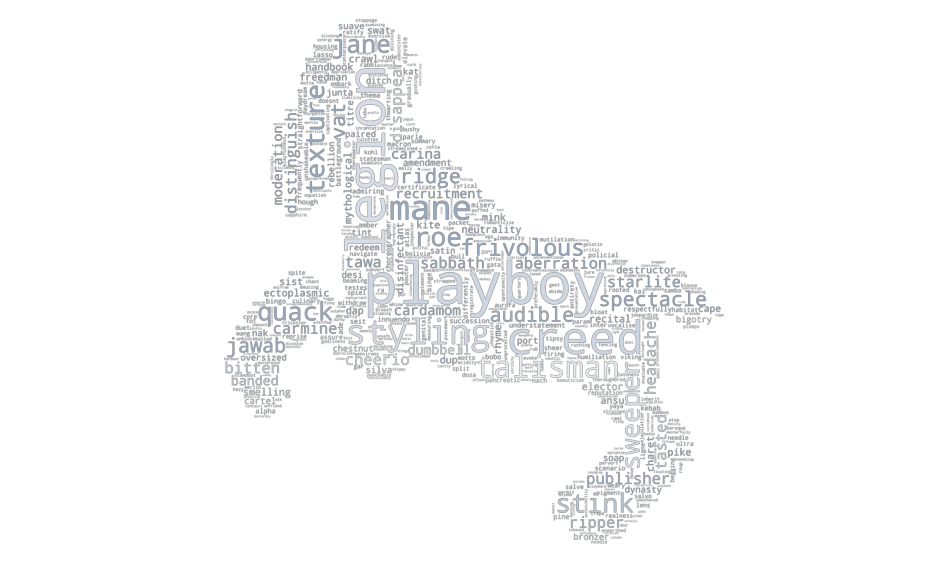

<Figure size 432x288 with 0 Axes>

In [184]:
# Create a wordcloud for each sign
for zodiac in ZODIAC_SIGNS[1:2]:
    fdist = tf_idf[zodiac]
    mask_zodiac = np.array(Image.open("./" + zodiac + ".png"))

    # Create the wordclouds with a transparent background and the shape of the zodiac sign
    wc_zodiacs = WordCloud(width=8000, height=5000, mode="RGBA", background_color = None, max_words=500, mask=mask_zodiac, collocations = False).generate_from_frequencies(fdist)

    # Color the wordcloud with the colors of the zodiac sign
    image_colors = ImageColorGenerator(mask_zodiac)

    # Plot and save the wordcloud
    plt.figure(figsize = (16,10))
    plt.imshow(wc_zodiacs.recolor(color_func=image_colors), interpolation='bilinear')
    plt.axis("off")
    plt.show()
    plt.savefig("./" + zodiac + "_wordcloud.png")
    

In [ ]:
# Create a wordcloud for each element

for element in ZODIAC_ELEMENTS:
    
    fdist = nltk.FreqDist(words)
    
    mask_element = np.array(Image.open("./" + element + ".png"))

    # Create the wordclouds with a transparent background and the shape of the zodiac sign
    wc_element = WordCloud(width=800, height=800, mode="RGBA", background_color = None, max_words=2000, mask=mask_element, collocations = False).generate_from_frequencies(fdist)

    # Color the wordcloud with the colors of the zodiac sign
    image_colors = ImageColorGenerator(mask_element)

    # Plot and save the wordcloud
    plt.figure(figsize = (17,17))
    plt.imshow(wc_element.recolor(color_func=image_colors), interpolation='bilinear')
    plt.axis("off")
    plt.show()
    plt.savefig("./" + element + "_wordcloud.png")


This is for joining all the data whenever its ready

In [16]:
with open("./datafiles/full_friends.pickle", "rb") as r:
    friends = pickle.load(r)
print(len(friends))
#df['Tokens'] = df['Handle'].map(tokens_dict) 
df['Following'] = df['Handle'].map(friends)


2041


In [17]:
with open("./datafiles/ids.pickle", "rb") as r:
    ids = pickle.load(r)
    
df['Id'] = df['Handle'].map(ids)

In [28]:
with open("./datafiles/friends1295.pickle", "rb") as r:
    f = pickle.load(r)
    
print(len(f))

44


In [10]:
df['Id'] = df['Id'].fillna(-1)
df['Id'] = df['Id'].astype(int)
df['Id'] = df['Id'].replace('-1', np.nan)

In [25]:
print(list(df.loc[pd.isna(df["Following"]), :].index))

[179, 512, 543, 873, 969, 1084, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, 1237, 1238, 1239, 1240, 1241, 1242, 1243, 1244, 1245, 1246, 1247, 1248, 1249, 1250, 1251, 1252, 1253, 1254, 1255, 1256, 1257, 1258, 1259, 1260, 1261, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1339, 1433, 1567, 1614, 1836, 1855, 1869, 1908, 2027, 2161, 2162]


In [197]:
df.to_pickle("414_full_df.plk")